<a href="https://colab.research.google.com/github/samuzp/own_models/blob/main/credit_risk_model(Default%20prediction)/credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook compares the performance of three classifier models: logistic regression, random forest, and XGBoost, aiming to predict whether a credit loan will default or be paid back.
Data source: https://www.kaggle.com/datasets/laotse/credit-risk-dataset/data

---




| Feature Name               | Description                                |
|---------------------------|--------------------------------------------|
| person_age                | Age                                        |
| person_income             | Annual Income                              |
| person_home_ownership     | Home ownership                            |
| person_emp_length         | Employment length (in years)              |
| loan_intent               | Loan intent                               |
| loan_grade                | Loan grade                                |
| loan_amnt                 | Loan amount                               |
| loan_int_rate             | Interest rate                             |
| loan_status               | Loan status (0 is non-default, 1 is default) |
| loan_percent_income       | Percent income                            |
| cb_person_default_on_file | Historical default                        |
| cb_preson_cred_hist_length| Credit history length

**IMPORTING LIBRARIES**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt


**LOAD DATA**

In [5]:
data_set="/content/credit_risk_dataset.csv"
data = pd.read_csv(data_set)
data.sample(50)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
10959,25,30000,RENT,0.0,MEDICAL,C,4200,12.23,0,0.14,Y,4
8169,23,42000,RENT,1.0,VENTURE,B,7325,12.69,0,0.17,N,3
14193,24,100995,MORTGAGE,6.0,DEBTCONSOLIDATION,A,16000,7.51,0,0.16,N,2
2940,24,142000,RENT,3.0,DEBTCONSOLIDATION,A,3000,7.88,0,0.02,N,2
8346,25,57000,OWN,4.0,MEDICAL,A,900,8.63,0,0.02,N,4
32247,36,135000,MORTGAGE,1.0,VENTURE,D,2500,14.91,0,0.02,N,17
23900,28,24000,RENT,0.0,PERSONAL,C,10000,12.87,1,0.42,Y,10
9620,22,63000,MORTGAGE,6.0,MEDICAL,A,10800,5.99,0,0.17,N,2
11916,21,29000,RENT,6.0,MEDICAL,C,11000,13.49,1,0.38,Y,2
30156,43,48000,MORTGAGE,2.0,VENTURE,A,10400,5.99,0,0.22,N,17


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


DATA CLEANING

In [7]:
#REMOVING DUPLICATES
  # Display duplicated entries
data.duplicated().sum()

165

In [8]:
  # dropping ALL duplicate values
data.drop_duplicates(keep = 'first', inplace = True)

In [9]:
data.shape

(32416, 12)

In [10]:
#Handling missing values
  #Display missing values information
data.isna().sum().sort_values(ascending=False)


loan_int_rate                 3095
person_emp_length              887
person_age                       0
person_income                    0
person_home_ownership            0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [11]:
#Removing missing values
data_new = data.dropna()
data_new.shape

(28501, 12)

DATA ANALYSIS

In [12]:
data_new.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,28501.0,27.738676,6.316166,20.00,23.00,26.00,30.00,144.00
person_income,28501.0,66654.411319,62376.028215,4000.00,39500.00,56000.00,80000.00,6000000.00
person_emp_length,28501.0,4.790148,4.157462,0.00,2.00,4.00,7.00,123.00
loan_amnt,28501.0,9658.533034,6329.604672,500.00,5000.00,8000.00,12500.00,35000.00
loan_int_rate,28501.0,11.045385,3.230748,5.42,7.90,10.99,13.48,23.22
loan_status,28501.0,0.217115,0.412289,0.00,0.00,0.00,0.00,1.00
loan_percent_income,28501.0,0.169517,0.106410,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,28501.0,5.800498,4.042153,2.00,3.00,4.00,8.00,30.00


In [13]:
data_new.describe(include=object).T

,count,unique,top,freq
person_home_ownership,28501,4,RENT,14498
loan_intent,28501,6,EDUCATION,5670
loan_grade,28501,7,A,9345
cb_person_default_on_file,28501,2,N,23411


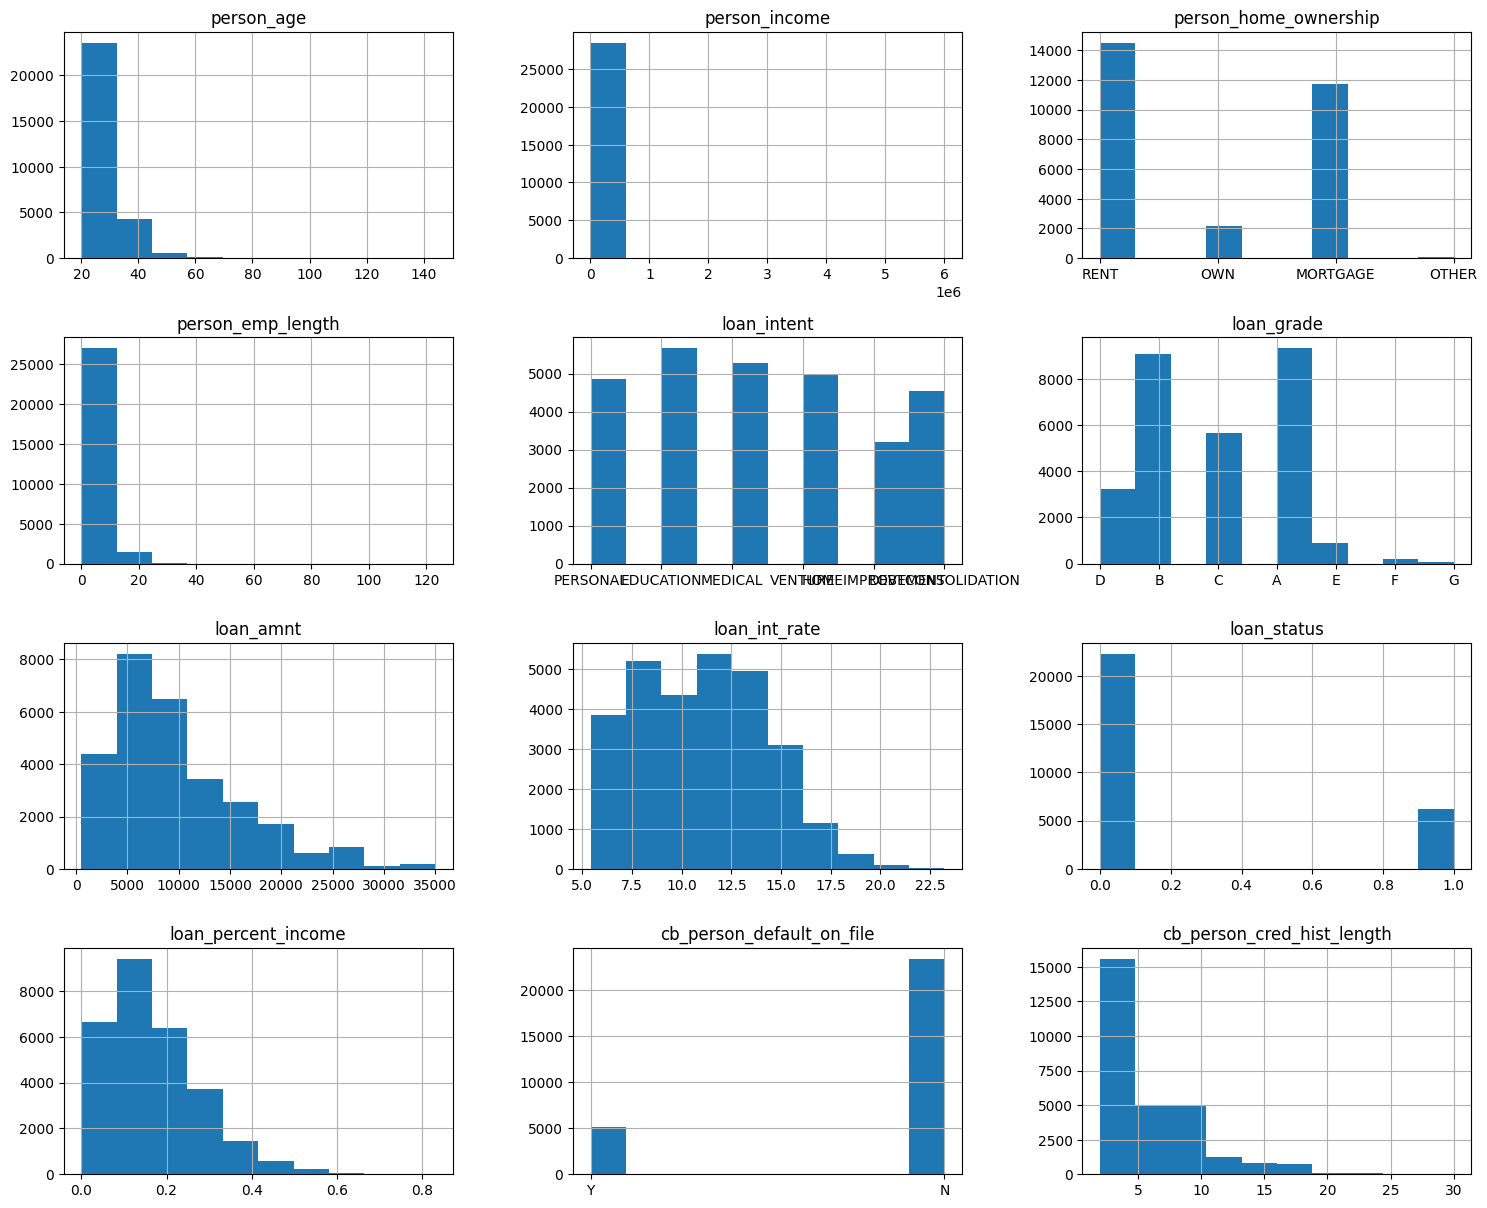

In [14]:
def plot_hist(df, ncols=3):
    """Plots histogram of all the column in the dataframe"""

    n = len(df.columns)
    nrows = round(n/ncols) + 1
    f = plt.figure()
    for indx in range(n):
        col = df.columns[indx]
        f.set_figheight(15)
        f.set_figwidth(15)
        plt.subplot(nrows, ncols, indx+1, title=col)
        df[col].hist()

    plt.tight_layout()
    plt.show()

plot_hist(data_new)


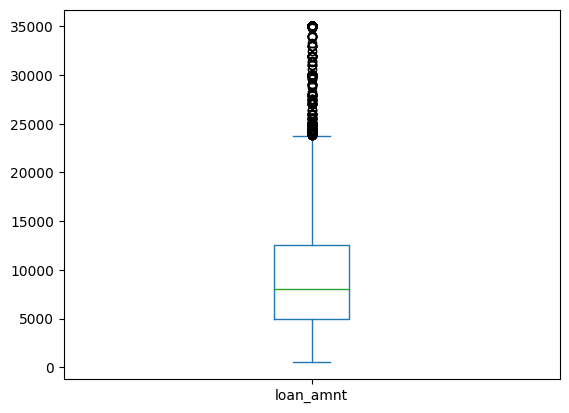

In [15]:
data_new.plot(y=['loan_amnt'], kind='box');

<ipython-input-16-1efde64c2eeb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_new.corr()


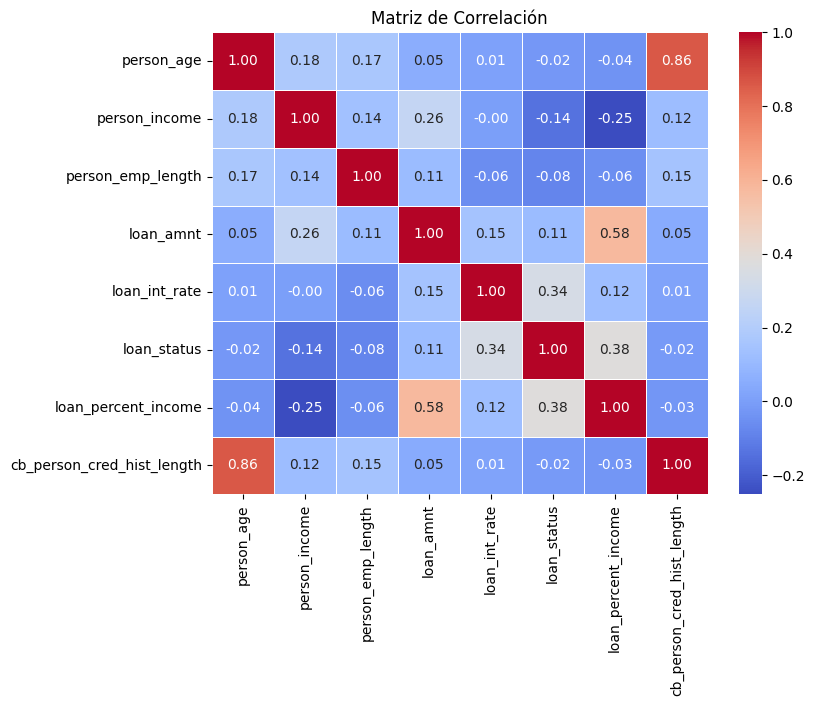

In [16]:
# Calcular la matriz de correlación
correlation_matrix = data_new.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

REMOVING OUTLIERS

In [17]:
def removing_outliers(df,columna):
  # calculate IQR for column Height
  Q1 = df[columna].quantile(0.25)
  Q3 = df[columna].quantile(0.75)
  IQR = Q3 - Q1

  # identify outliers
  threshold = 1.5
  outliers = df[(df[columna] < Q1 - threshold * IQR) | (df[columna] > Q3 + threshold * IQR)]
  # drop rows containing outliers
  df = df.drop(outliers.index)
  return df
# summarize the shape of the training dataset
print("Before removing Outliers:", data_new.shape[0])
data_clean=removing_outliers(data_new,"person_income")
data_clean=removing_outliers(data_clean,"loan_amnt")
# summarize the shape of the training dataset
print("After removing Outliers:", data_clean.shape[0])


Before removing Outliers: 28501
After removing Outliers: 25969


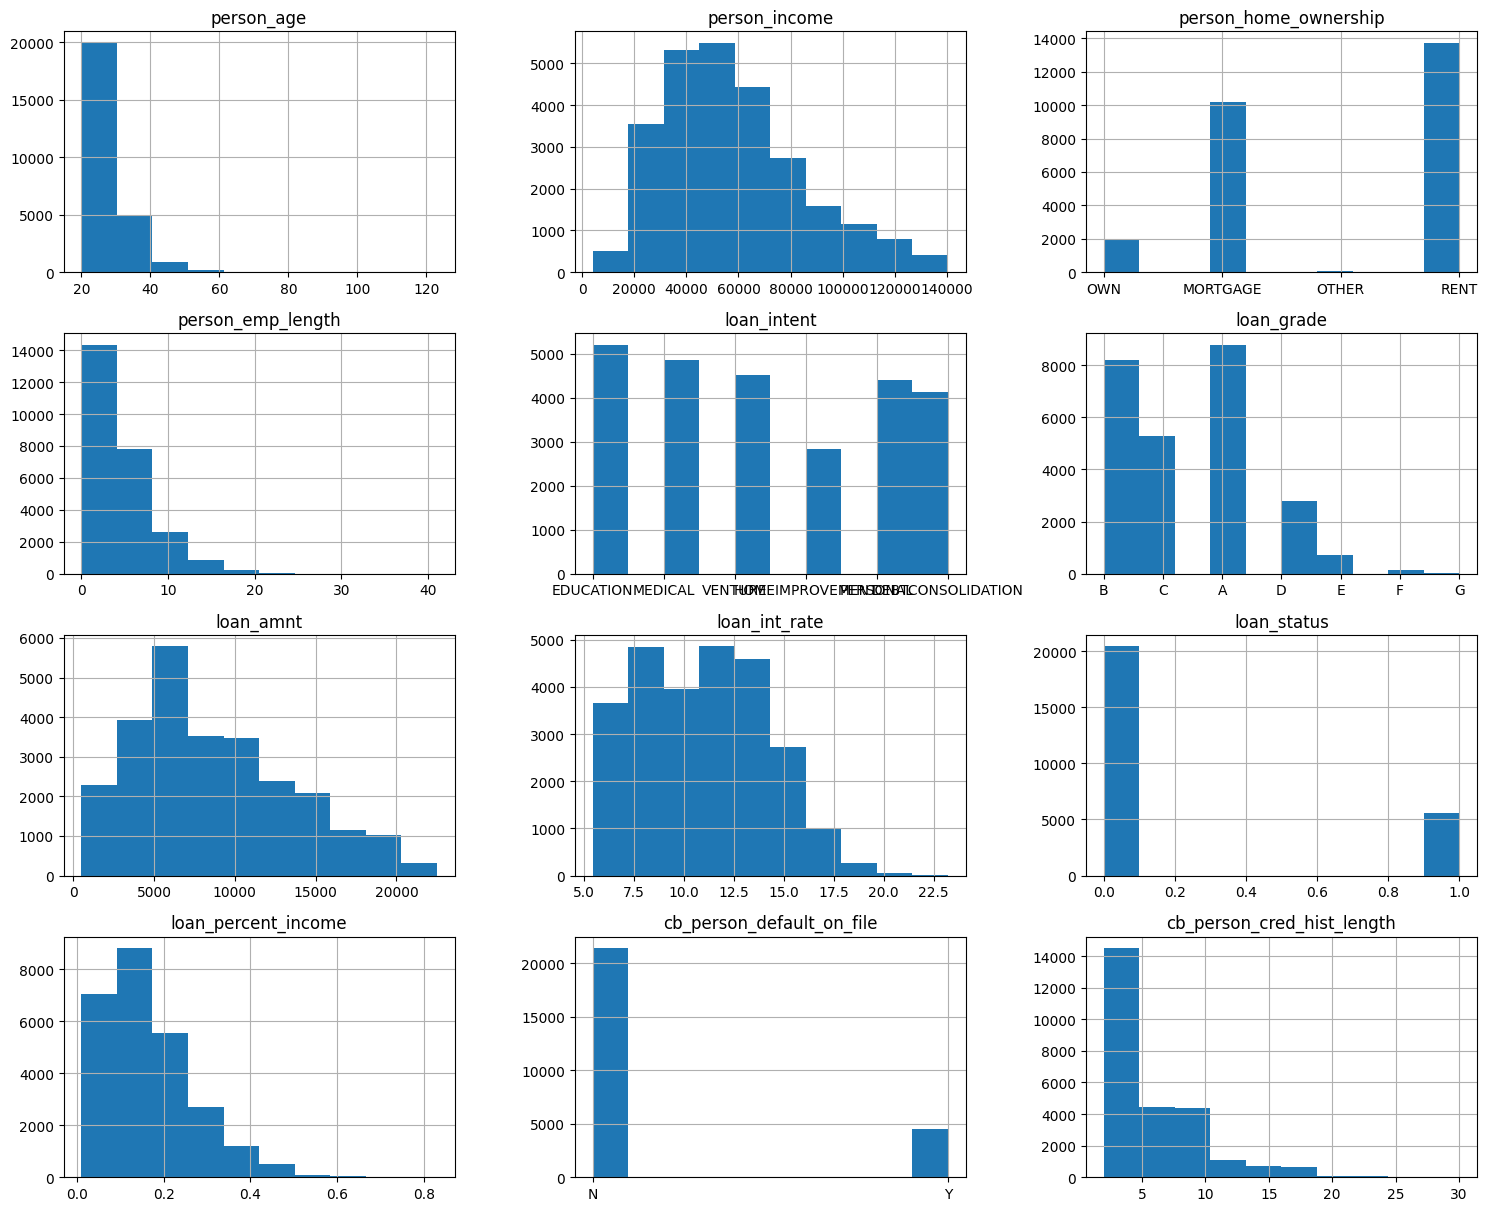

In [18]:
plot_hist(data_clean)

APPLYING "LABEL ENCODING" AND "ONE HOT ENCODING"

In [20]:
from sklearn.preprocessing import LabelEncoder
def preprocess(df):
    numeric = ["person_age","person_income","person_emp_length ","loan_amnt ","loan_percent_income ","cb_person_cred_hist_length" ]
    cat_nominal = ["person_home_ownership","loan_intent","loan_grade"]
    cat_binary = ["cb_person_default_on_file","loan_status"]

    df[cat_binary] = df[cat_binary].apply(LabelEncoder().fit_transform)  # label_encoding

    df = pd.get_dummies(df, columns=cat_nominal, prefix=cat_nominal)  # one-hot encoding
    return df

data_clean=preprocess(data_clean)

SPLITTING

In [21]:
X = data_clean.drop("loan_status", axis=1)
y = data_clean["loan_status"]
X_train, X_test, y_train, y_test = None, None, None, None
random_seed = 0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

**LOGISTIC REGRESSION**


---




In [25]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear")
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

CONFUSION MATRIX

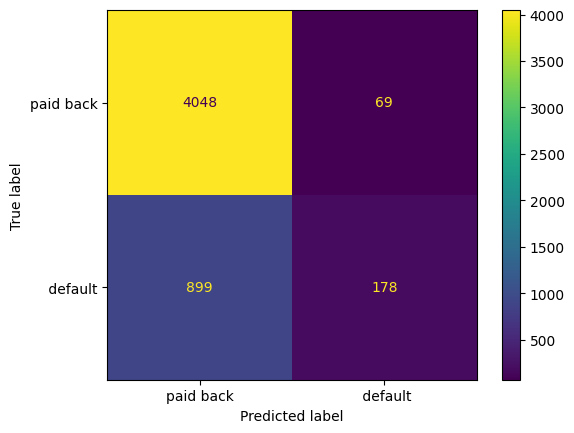

In [33]:
### Plot Confusion Matrix.
class_names =['paid back', ' default']
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test, display_labels=class_names);

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy, precision, recall, f1Score = None, None, None, None

def calculate_score(y_test, y_pred):
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate precision
    precision = precision_score(y_test, y_pred)

    # Calculate recall
    recall = recall_score(y_test, y_pred)

    # Calculate F1 score
    f1Score = f1_score(y_test, y_pred)

    return accuracy, precision, recall, f1Score

accuracy, precision, recall, f1Score = calculate_score(y_test, y_pred)
print("Test Accuracy:", round(accuracy,2))
print("Test Precision Score:", round(precision,2))
print("Test Recall Score:", round(recall,2))
print("Test F1 Score:", round(f1Score,2))

Test Accuracy: 0.81
Test Precision Score: 0.72
Test Recall Score: 0.17
Test F1 Score: 0.27


**RANDOM FOREST**

---



In [35]:
from sklearn.ensemble import RandomForestClassifier
# Create and train the RandomForestClassifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred2 = random_forest_model.predict(X_test)

In [37]:
accuracy2, precision2, recall2, f1Score2 = None, None, None, None
accuracy2, precision2, recall2, f1Score2 = calculate_score(y_test, y_pred2)
print("Test Accuracy:", round(accuracy2,2))
print("Test Precision Score:", round(precision2,2))
print("Test Recall Score:", round(recall2,2))
print("Test F1 Score:", round(f1Score2,2))

Test Accuracy: 0.93
Test Precision Score: 0.96
Test Recall Score: 0.71
Test F1 Score: 0.82


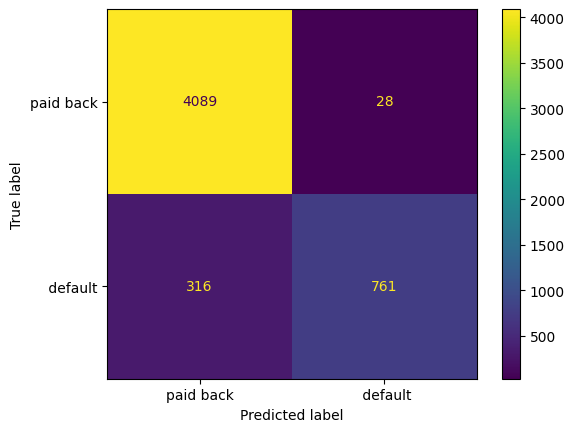

In [39]:
### Plot Confusion Matrix.
class_names =['paid back', ' default']
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(random_forest_model, X_test, y_test, display_labels=class_names);

**XGBoost**

---



In [40]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred3 = xgb_model.predict(X_test)

In [43]:

accuracy3, precision3, recall3, f1Score3 = calculate_score(y_test, y_pred3)
print("Test Accuracy:", round(accuracy3,2))
print("Test Precision Score:", round(precision3,2))
print("Test Recall Score:", round(recall3,2))
print("Test F1 Score:", round(f1Score3,2))

Test Accuracy: 0.92
Test Precision Score: 0.93
Test Recall Score: 0.68
Test F1 Score: 0.78


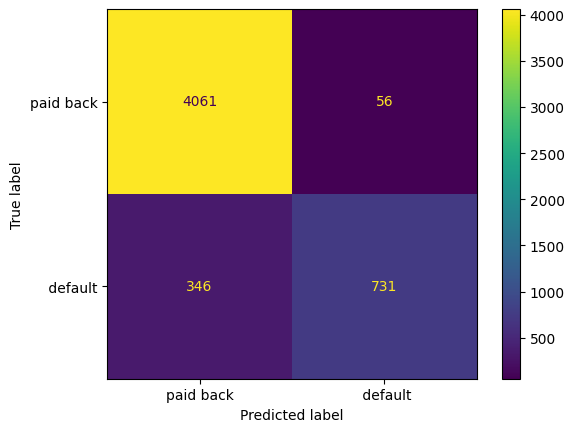

In [44]:
### Plot Confusion Matrix.
class_names =['paid back', ' default']
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(xgb_model, X_test, y_test, display_labels=class_names);

**FINAL COMPARISSON**

---


In [61]:
lst = list(calculate_score(y_test, y_pred))
lst2 = list(calculate_score(y_test, y_pred2))
lst3 = list(calculate_score(y_test, y_pred3))
lst = [round(val, 2) for val in lst]
lst2 = [round(val, 2) for val in lst2]
lst3 = [round(val, 2) for val in lst3]
df = pd.DataFrame({
    'Métrica': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Regresión Logística': lst,
    'Random Forest': lst2,
    'XGBoost': lst3
})

# Imprimir el DataFrame
df

,Métrica,Regresión Logística,Random Forest,XGBoost
0,Accuracy,0.81,0.93,0.92
1,Precision,0.72,0.96,0.93
2,Recall,0.17,0.71,0.68
3,F1 Score,0.27,0.82,0.78
